<a href="https://colab.research.google.com/github/daham-13/CM2604-Coursework/blob/main/CM2604_Coursework_2330906.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RGU ID: 2330906

# Load Data

In [504]:
#import pandas
import pandas as pd

#Fetch data
url = "https://raw.githubusercontent.com/daham-13/CM2604-Coursework/refs/heads/main/Data/bank-additional/bank-additional-full.csv"
data = pd.read_csv(url, sep=";")
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# Data Preprocessing

### Data Overview

In [505]:
#Basic information of data

# General Information
print(data.info())

# Summary Statistics
print(data.describe(include="all"))

# Shape of the Data
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [506]:
#Null values

# Replace "unknown" with NaN to treat them as missing values
data = data.replace("unknown", pd.NA)

#Finding the total number of null values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

missing_presentage = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values Percentage:\n", missing_presentage)

print("All null rows: ",missing_values.sum())

Missing Values:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Missing Values Percentage:
 age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price

In [507]:
#Duplicate Data

# Count Duplicate Rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 12


Numerical Columns:
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188

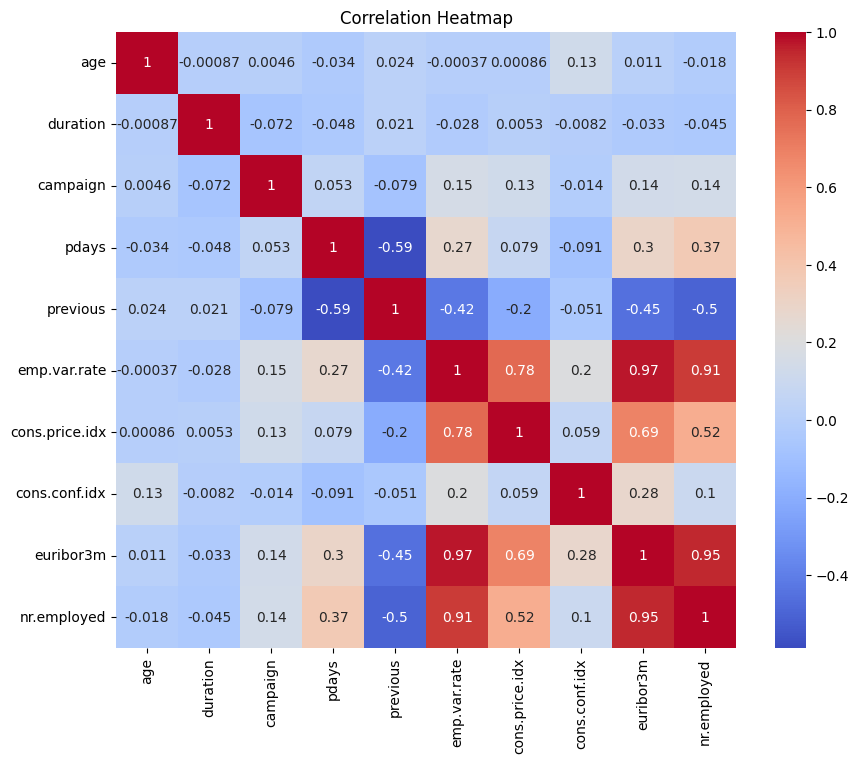

In [508]:
#Feature Analization

# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:\n", numerical_columns)

# Summary Statistics
print(data[numerical_columns].describe())

# Correlation Heatmap
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Categorical Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
job: 11 unique values
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64


marital: 3 unique values
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64


education: 7 unique values
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64


default: 2 unique values
default
no     32588
yes        3
Name: count, dtype: int64


housing: 2 unique values
housing
yes    21576
no   

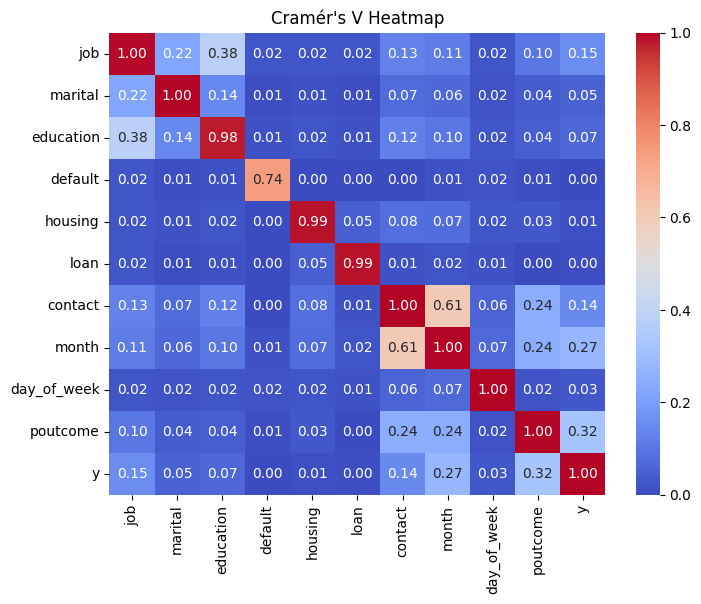

In [509]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=["object", "category"]).columns
print("Categorical Columns:\n", categorical_columns)

# Unique values and frequency
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts())
    print("\n")

#Cramér's V correlation for categorical variables
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate C
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return np.sqrt(chi2 / (len(x) * (min(contingency_table.shape) - 1)))

# Create an empty correlation matrix
corr_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                           columns=categorical_columns, index=categorical_columns)

# Fill the correlation matrix with Cramér's V values
for i in range(len(categorical_columns)):
    for j in range(i, len(categorical_columns)):
        corr_matrix.iloc[i, j] = cramers_v(data[categorical_columns[i]], data[categorical_columns[j]])
        corr_matrix.iloc[j, i] = corr_matrix.iloc[i, j]


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.show()


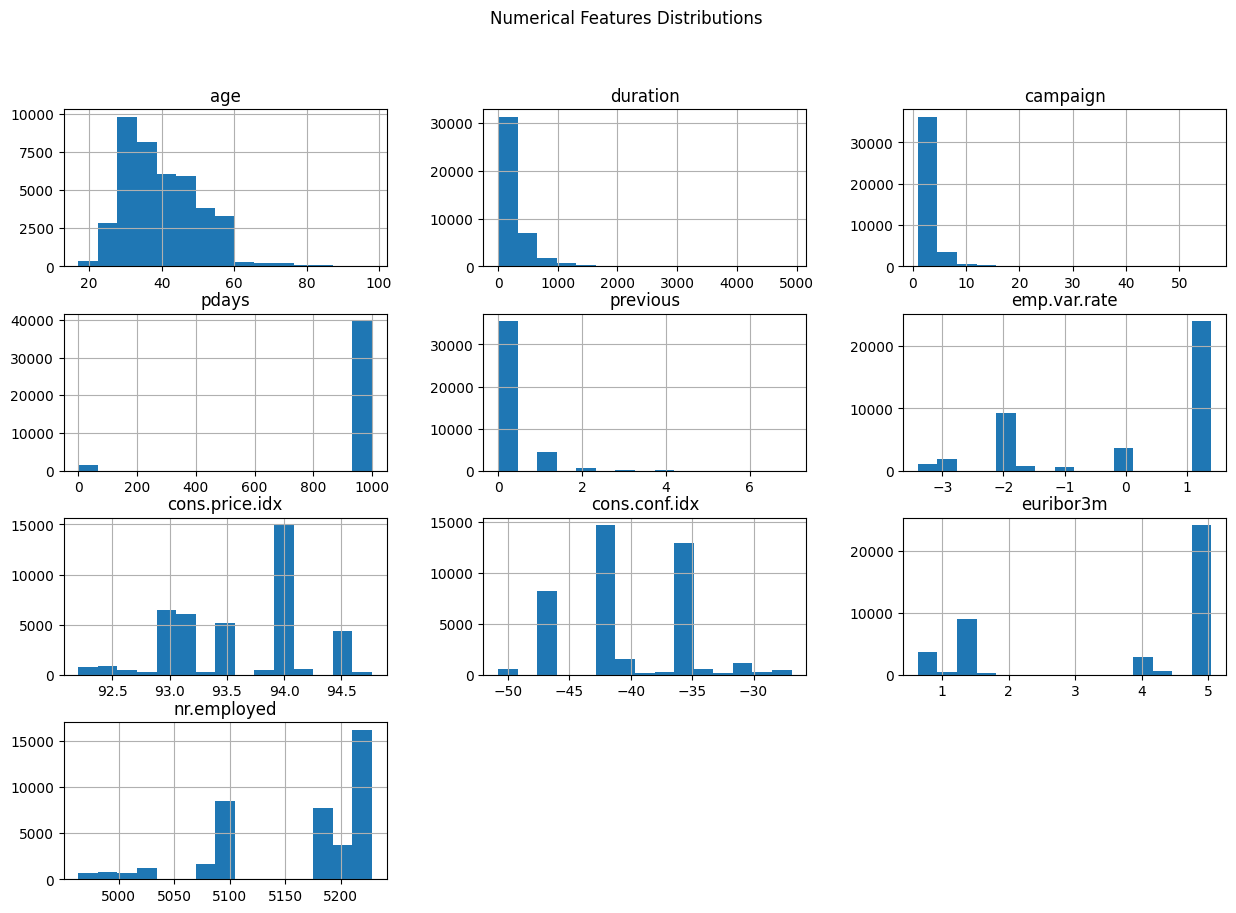

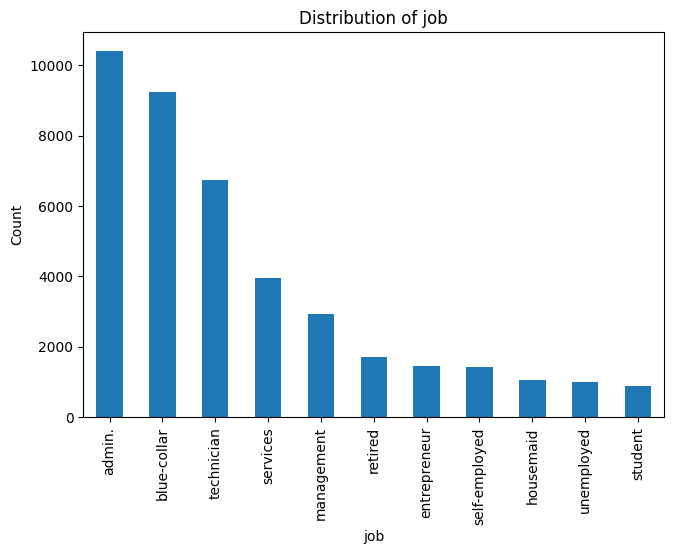

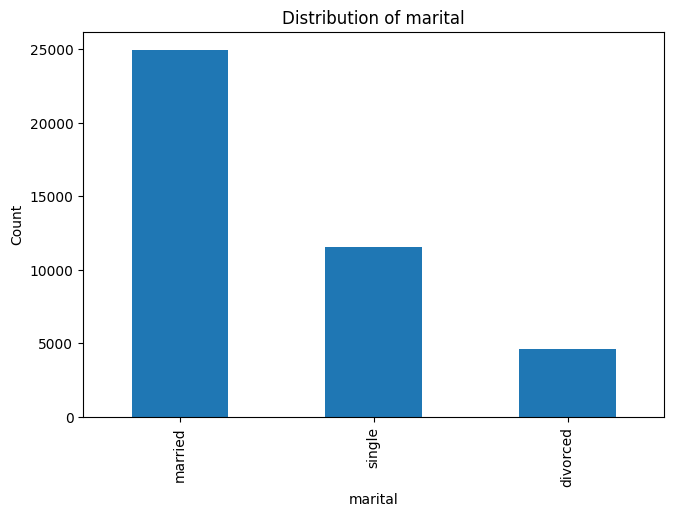

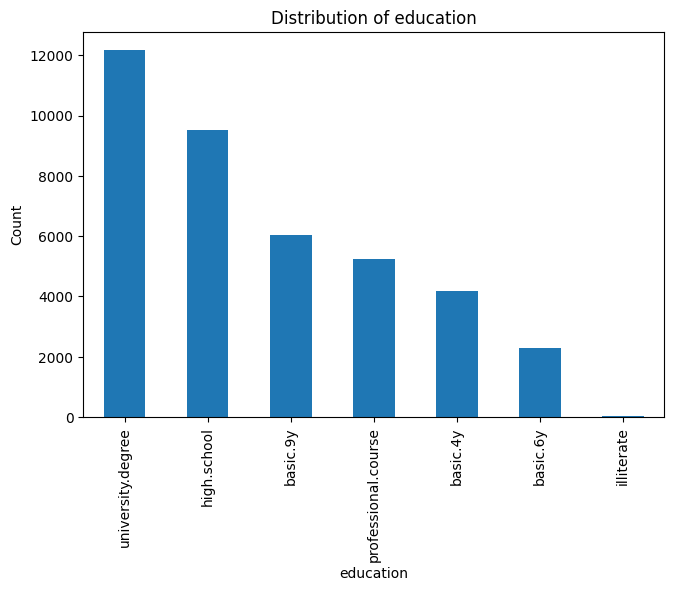

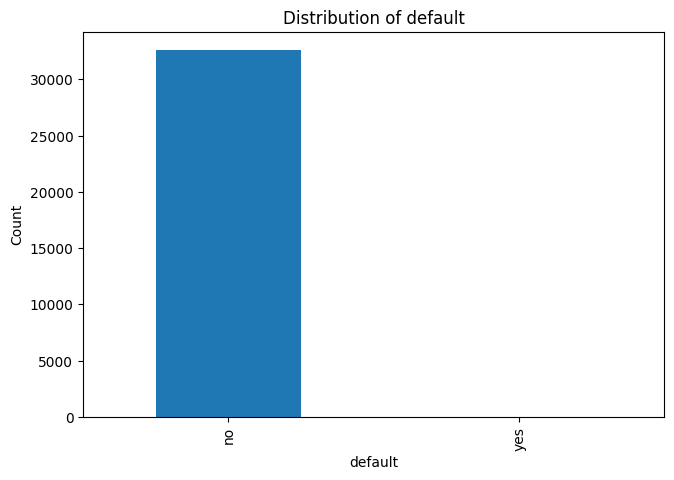

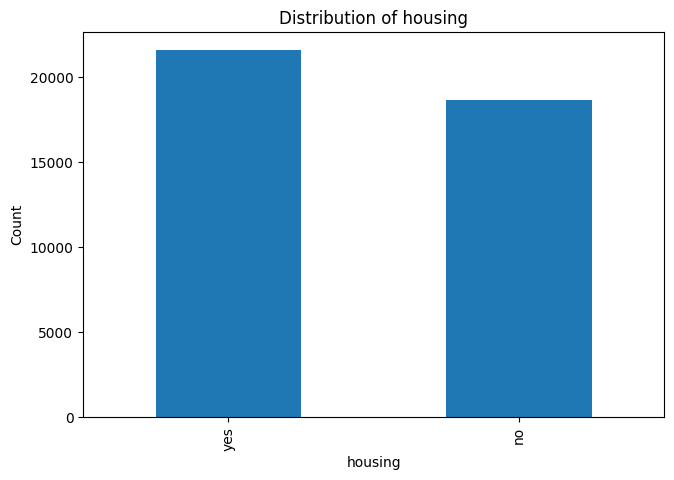

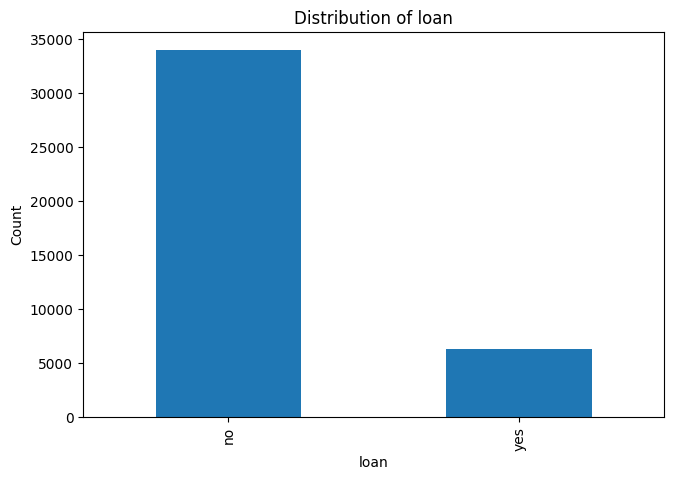

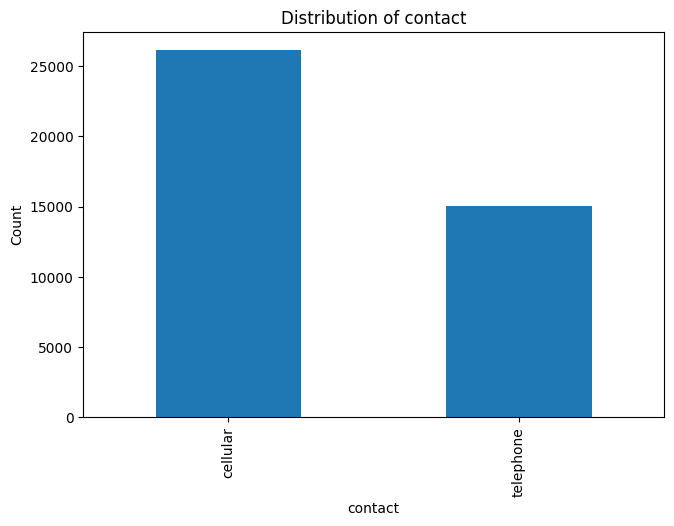

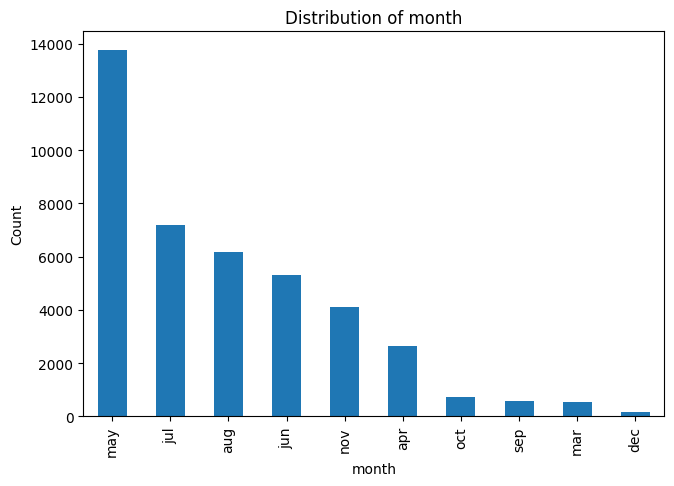

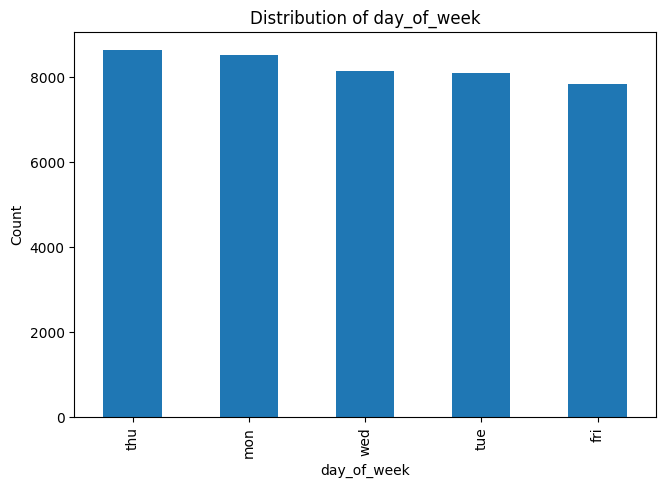

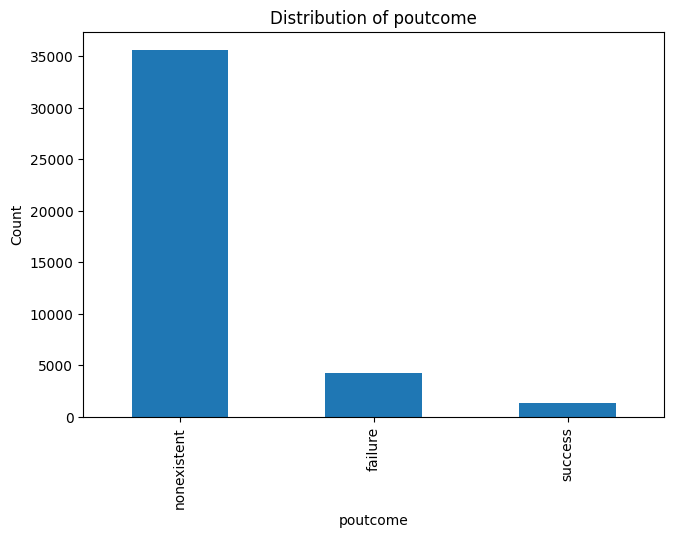

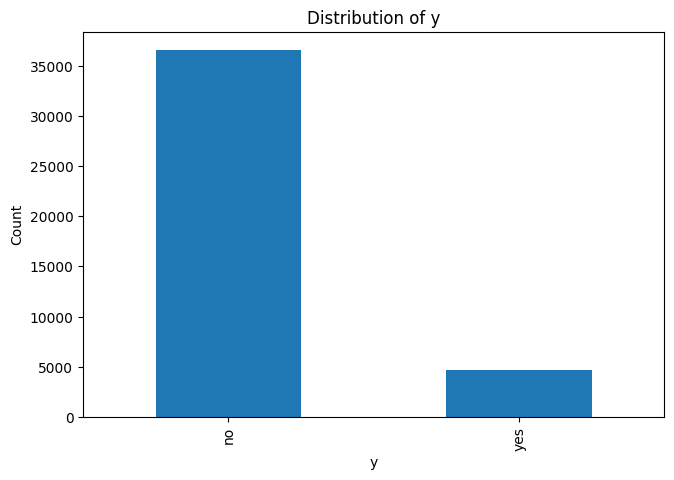

In [510]:
# Plot histogram for numerical columns
data[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle("Numerical Features Distributions")
plt.show()

# Plot bar plots for categorical columns
for col in categorical_columns:
    data[col].value_counts().plot(kind='bar', figsize=(7.5, 5), title=f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [511]:
# Imbalance Ratio
class_distribution = data["y"].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)


Class Distribution (%):
 y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


### Preprocess

In [512]:
# Columns to drop based on low percentage of missing values
columns_to_check = ['job', 'marital', 'education', 'housing', 'loan']

# Drop rows where any of the selected columns have null values
dataframe = data.dropna(subset=columns_to_check)
dataframe = dataframe.drop('default', axis=1)
print("Cleaned DataFrame (rows with nulls in specified columns dropped):")
print(dataframe.info())

#Null values

#Finding the total number of null values
missing_values = dataframe.isnull().sum()
print("Missing Values:\n", missing_values)

Cleaned DataFrame (rows with nulls in specified columns dropped):
<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx  

In [513]:
# Remove duplicates
dataframe = dataframe.drop_duplicates()

<ipython-input-514-7a1e81dbf5ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pdays'] = (dataframe['pdays'] != 999).astype(int)


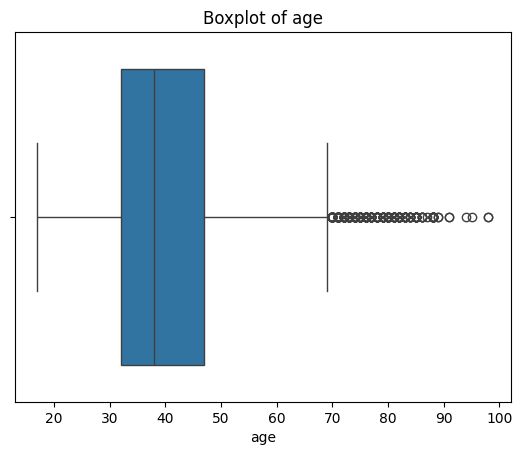

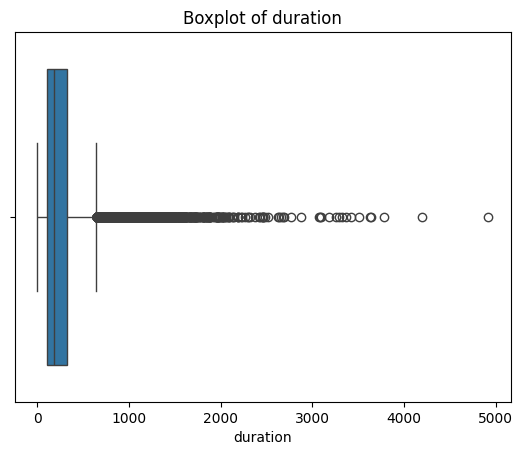

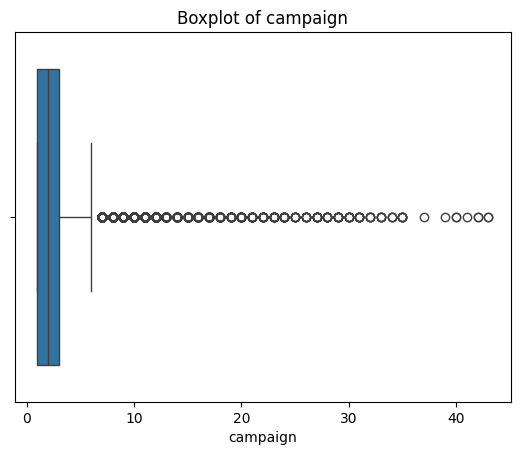

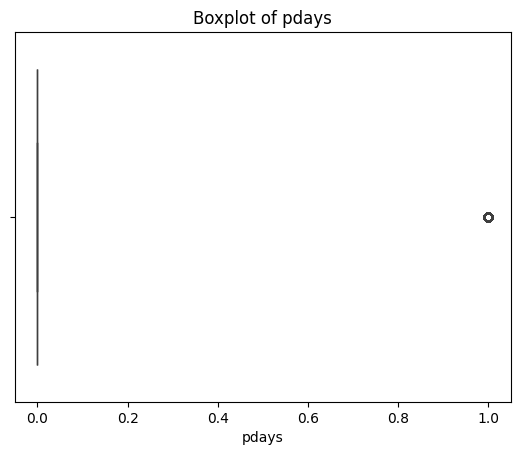

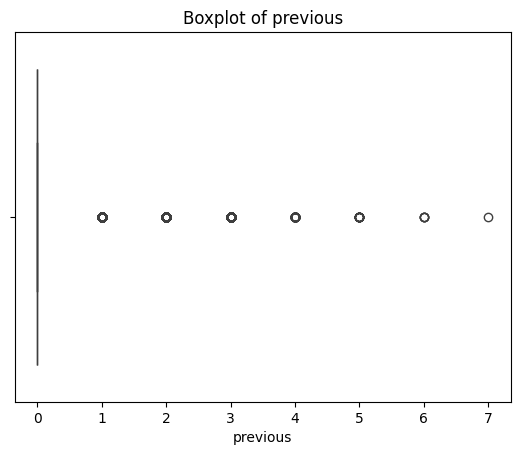

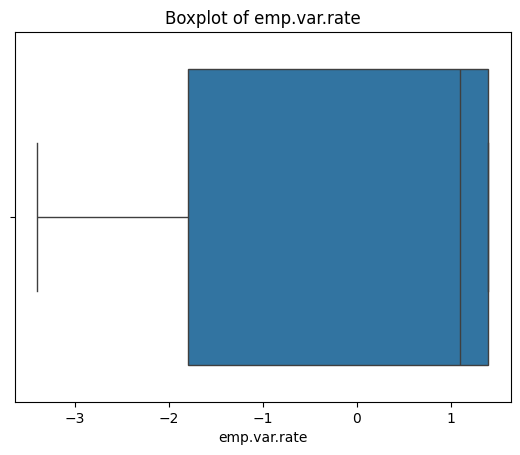

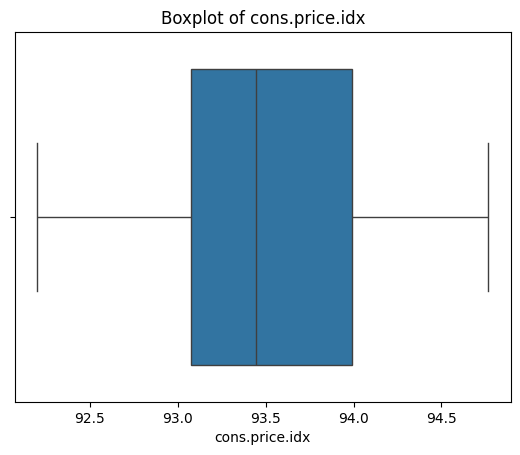

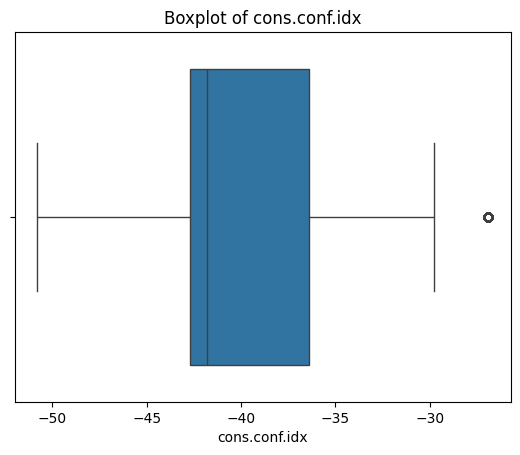

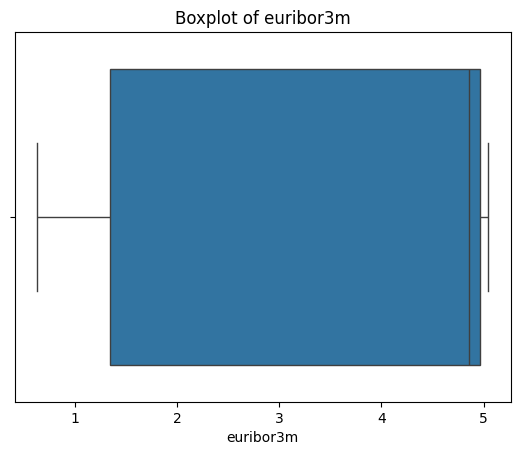

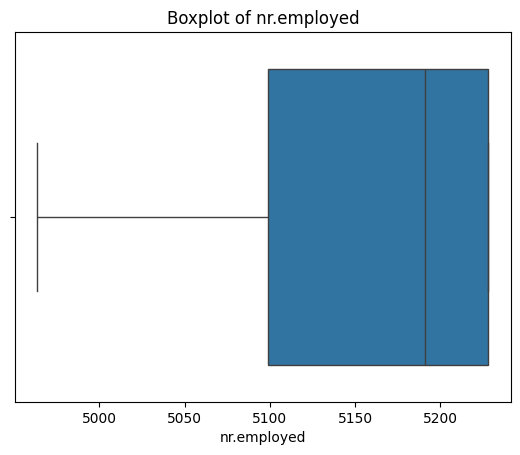

In [514]:
#Remove Outliers
#Identifying Outliers

# Convert 'pdays' to a binary column: 1 if previously contacted, 0 if not
dataframe['pdays'] = (dataframe['pdays'] != 999).astype(int)

numerical_columns = dataframe.select_dtypes(include=["int64", "float64"]).columns


for col in numerical_columns:
  sns.boxplot(data=dataframe, x=col)
  plt.title(f"Boxplot of {col}")
  plt.show()

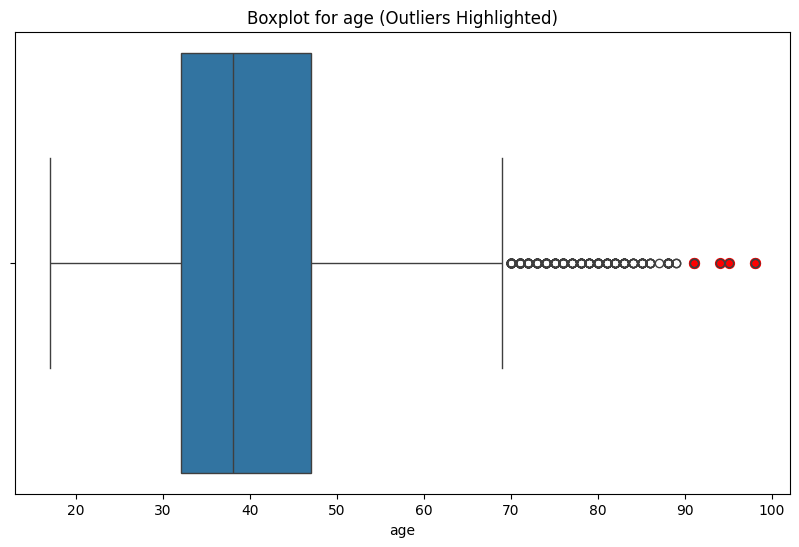

Bounds for age - Lower: -10.0, Upper: 89.0
Number of Outliers: 6



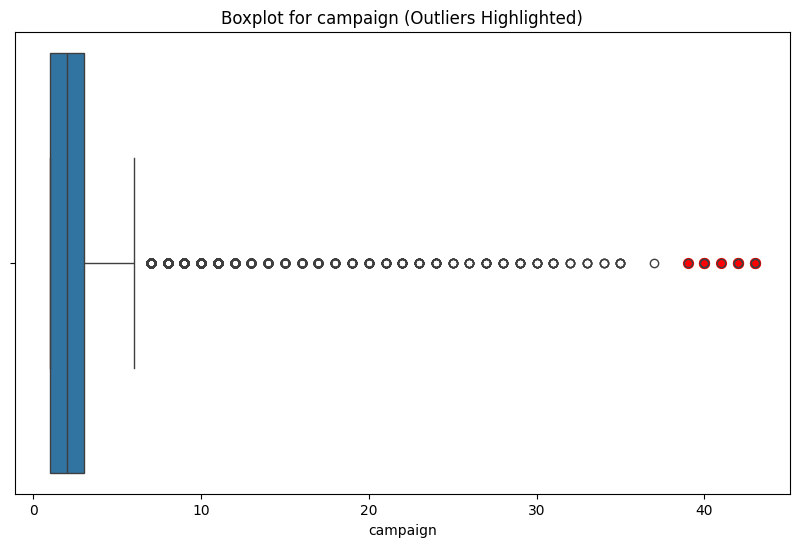

Bounds for campaign - Lower: -33.0, Upper: 37.0
Number of Outliers: 8



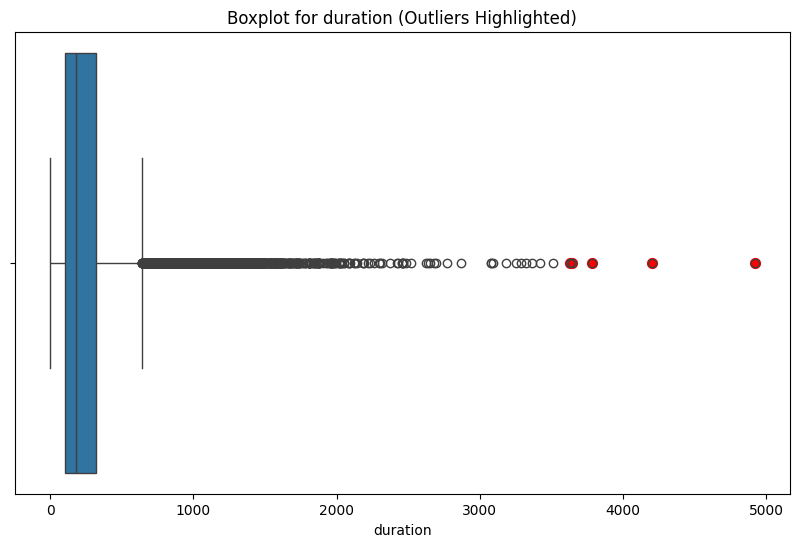

Bounds for duration - Lower: -3153.0, Upper: 3574.0
Number of Outliers: 5



In [515]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to check
columns_to_check = ['age', 'campaign', 'duration']
multipliers = (2.8,17,15)
def remove_outliers(col, multiplier):
    # Calculate Q1, Q3, and IQR
    global dataframe
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Identify outliers
    outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]

    # Boxplot to visualize the data
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x=col)
    plt.title(f"Boxplot for {col} (Outliers Highlighted)")

    # Highlight outliers in red on the boxplot
    outlier_values = outliers[col].values
    for outlier_value in outlier_values:
      plt.scatter(x=outlier_value, y=0, color='red', s=50, label='Outlier')
    plt.show()

    # Print the bounds and count of outliers
    print(f"Bounds for {col} - Lower: {lower_bound}, Upper: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}\n")

    dataframe.drop(outliers.index, inplace=True)

for col, multiplier in zip(columns_to_check, multipliers):
    remove_outliers(col, multiplier)

In [516]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataframe[['age', 'campaign', 'pdays',	'previous',	'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] = scaler.fit_transform(dataframe[['age', 'campaign', 'pdays',	'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])
print(dataframe)
dataframe.shape

            age          job  marital            education housing loan  \
0      1.572924    housemaid  married             basic.4y      no   no   
1      1.670328     services  married          high.school      no   no   
2     -0.277752     services  married          high.school     yes   no   
3      0.014460       admin.  married             basic.6y      no   no   
4      1.572924     services  married          high.school      no  yes   
...         ...          ...      ...                  ...     ...  ...   
41183  3.228792      retired  married  professional.course     yes   no   
41184  0.598884  blue-collar  married  professional.course      no   no   
41185  1.572924      retired  married    university.degree     yes   no   
41186  0.404076   technician  married  professional.course      no   no   
41187  3.326196      retired  married  professional.course     yes   no   

         contact month day_of_week  duration  campaign     pdays  previous  \
0      telephone   ma

(38213, 20)

In [517]:
#Convert categorical variables into numerical

encode_features = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
map_features = ['housing', 'loan', 'y']

def encode(columns1, columns2):
    global dataframe
    for column in columns1:
      dataframe = pd.get_dummies(dataframe, columns=[column], drop_first=True)

    for column in columns2:
      dataframe[column] = dataframe[column].map({'yes': 1, 'no': 0})

encode(encode_features, map_features)



In [518]:
# Count rows where duration is 0
zero_duration_count = dataframe[dataframe['duration'] == 0].shape[0]
print(f"Number of rows with duration = 0: {zero_duration_count}")
 # Drop rows where duration is 0
dataframe = dataframe[dataframe['duration'] != 0]

# Confirm the rows have been dropped
print(f"Remaining rows after dropping duration = 0: {dataframe.shape[0]}")


Number of rows with duration = 0: 4
Remaining rows after dropping duration = 0: 38209


In [519]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38209 entries, 0 to 41187
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38209 non-null  float64
 1   housing                        38209 non-null  int64  
 2   loan                           38209 non-null  int64  
 3   duration                       38209 non-null  int64  
 4   campaign                       38209 non-null  float64
 5   pdays                          38209 non-null  float64
 6   previous                       38209 non-null  float64
 7   emp.var.rate                   38209 non-null  float64
 8   cons.price.idx                 38209 non-null  float64
 9   cons.conf.idx                  38209 non-null  float64
 10  euribor3m                      38209 non-null  float64
 11  nr.employed                    38209 non-null  float64
 12  y                              38209 non-null  int6

# Split

In [520]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = dataframe.drop("y", axis=1)
y = dataframe["y"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [521]:
#Sample dataset

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42, sampling_strategy="auto")
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## Random Forest

### Train

In [522]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
randomForestModel.fit(X_train_sampled, y_train_sampled)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, random_state=42)

### Test and Evaluate  

In [523]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = randomForestModel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.00%


In [524]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6398  397]
 [ 291  556]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6795
           1       0.58      0.66      0.62       847

    accuracy                           0.91      7642
   macro avg       0.77      0.80      0.78      7642
weighted avg       0.92      0.91      0.91      7642



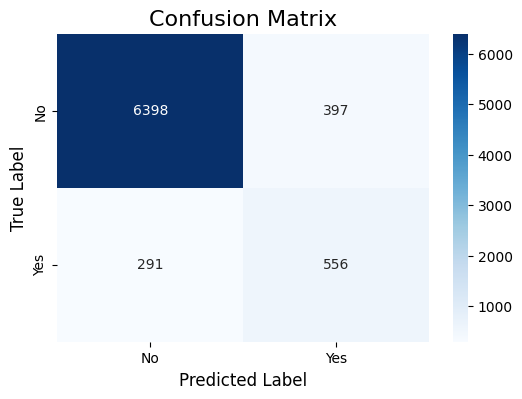

In [525]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

# Add labels, title, and formatting
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()


## Nural Network

In [526]:
# Remove Correlated Column
corr_matrix = dataframe.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

dataframe = dataframe.drop(columns=correlated_features)

### Train

In [527]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target
X = dataframe.drop("y", axis=1)
y = dataframe["y"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42, sampling_strategy = 0.85)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

# Define the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_smote.shape[1]),  # Input layer
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_train_smote, y_train_smote),
                    epochs=20, batch_size=32, verbose=1)

# Predict on the test set
y_pred_neural = model.predict(X_test)
y_pred_neural = (y_pred > 0.7).astype(int)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1571/1571 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6020 - loss: 4.2227 - val_accuracy: 0.8278 - val_loss: 0.4162
Epoch 2/20
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8031 - loss: 0.4417 - val_accuracy: 0.8671 - val_loss: 0.3217
Epoch 3/20
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8515 - loss: 0.3572 - val_accuracy: 0.8951 - val_loss: 0.2668
Epoch 4/20
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8750 - loss: 0.2991 - val_accuracy: 0.9026 - val_loss: 0.2521
Epoch 5/20
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8922 - loss: 0.2645 - val_accuracy: 0.9153 - val_loss: 0.2238
Epoch 6/20
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9002 - loss: 0.2372 - val_accuracy: 0.9250 - val_loss: 0.1835
Epoch 7/20
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9062 - loss: 0.2167 - val_accuracy: 0.9293 - val_loss: 0.1751
Epoch 8/20
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9126 - loss: 0.2094 - val_accura

### Test and Evalurate

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_neural))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_neural))

In [ ]:
cm = confusion_matrix(y_test, y_pred_neural)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

# Add labels, title, and formatting
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()